In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [55]:
# load data
# https://www.kaggle.com/jpacse/datasets-for-churn-telecom

In [56]:
df = pd.read_csv('./datasets-for-churn-telecom/cell2celltrain.csv')
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

### 
- there are 57 feautures, and 1 target ('churn')
- there are 51047 records (including missing values)
- note that our target is a categorical variable, so we are working on a classsification problem, to be more specific, binary classification problem

In [58]:
# missing data

Handsets                 0.000020
HandsetModels            0.000020
CurrentEquipmentDays     0.000020
ServiceArea              0.000470
MonthlyRevenue           0.003056
MonthlyMinutes           0.003056
TotalRecurringCharge     0.003056
DirectorAssistedCalls    0.003056
OverageMinutes           0.003056
RoamingCalls             0.003056
PercChangeMinutes        0.007189
PercChangeRevenues       0.007189
AgeHH1                   0.017807
AgeHH2                   0.017807
dtype: float64


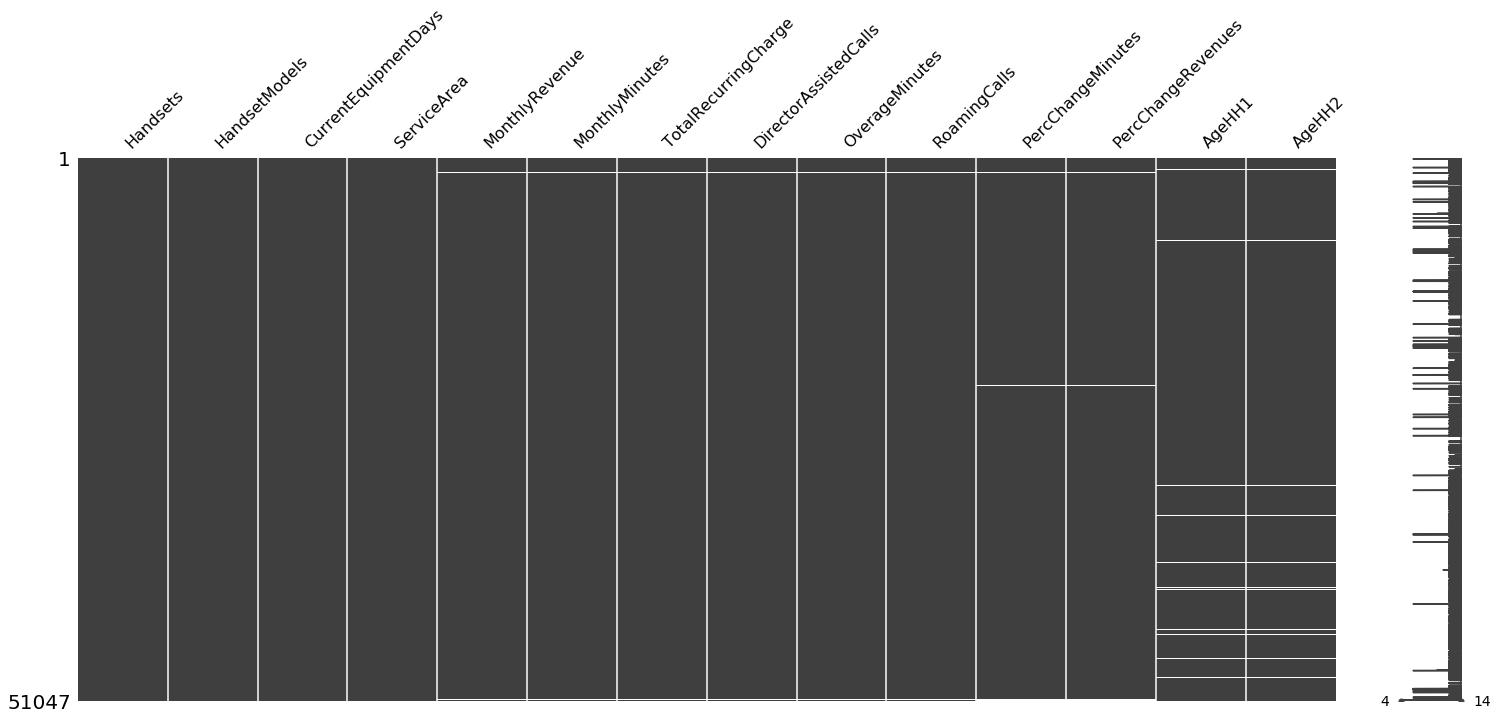

In [59]:
import missingno as msno

missing_values = df.isnull().sum() / len(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
print(missing_values)

msno.matrix(df[missing_values.index])

###
- There 14 out of 57 features including null values
- Among the 14 features, the percentage of missing values is small (less than 1%)
- We can choose 
    - either drop 
    - or impute the missing values. 
- Note tha, comparing to imputation, dropna will loss (51047-49752)/51047=0.0254 of the data, which is acceptable.
- In this task, we can perform a simple imputation by fillna all the categorical variables with "UNKNOWN", then drop all the null records. In this way, we can find trade-off between lossing information and introducing noise from imputation.

In [60]:
df_original = df.copy()

In [61]:
df['ServiceArea'].fillna('MISSING', inplace=True)
df = df.dropna(axis=0)
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


In [62]:
# coutinous and categorical variables

In [63]:
print("number of object variables: {}".format(len(df.select_dtypes(include='object').columns)))
print("number of int variable: {}".format(len(df.select_dtypes(include='int64').columns)))
print("number of float variable: {}".format(len(df.select_dtypes(include='float').columns)))

# df_object = df.select_dtypes(include='object')
# df_continous = df.select_dtypes(exclude='object')
val_num =[df[col].nunique() for col in df.columns]
df_val_count = pd.concat([pd.DataFrame(df.columns), 
                          pd.DataFrame(val_num), 
                          pd.DataFrame(df.dtypes.values)], axis=1)
df_val_count.columns = ['col_name', 'val_count', 'dtypes']
df_val_count = df_val_count.sort_values(by=['val_count'])
# df_val_count[df_val_count.val_count <100]
df_val_count

number of object variables: 23
number of int variable: 9
number of float variable: 26


,col_name,val_count,dtypes
43,HasCreditCard,2,object
41,NonUSTravel,2,object
42,OwnsComputer,2,object
38,BuysViaMailOrder,2,object
37,Homeownership,2,object
36,RVOwner,2,object
46,NewCellphoneUser,2,object
40,OptOutMailings,2,object
47,NotNewCellphoneUser,2,object
34,HandsetWebCapable,2,object


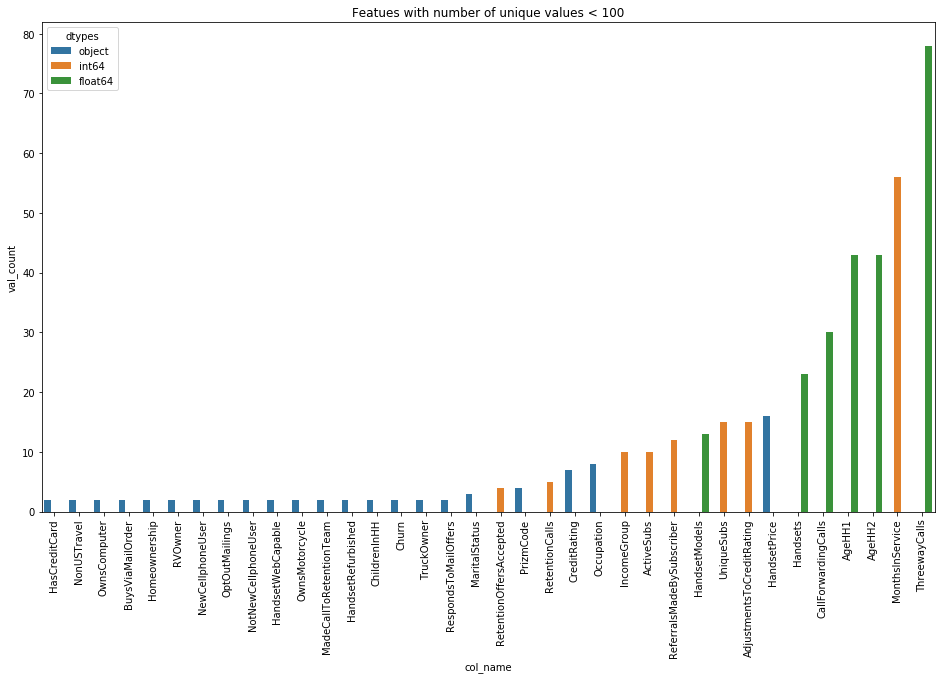

In [64]:
plt.figure(figsize=(16,9))
sns.barplot(
    data= df_val_count[df_val_count.val_count<100],
    x= 'col_name',
    y= 'val_count',
    hue = 'dtypes')
plt.xticks(rotation=90)
plt.title('Featues with number of unique values < 100')
plt.show()

###
- there are 35 non-object-type variables, 23 object-type variables, 
- 22 out of 23 have less-than-20 unique values,"ServiceArea" 743 unique variables
- except "serviceArea", the other 22 object-type variables can be easily handled using one-hot-encoding.
- for "serviceArea" variable, we need to either use models that can handel categorical type or just drop it.
- some int variables have categorical-variable-like features, i.e. "RetentionOffersAccepted", "RetentionCalls", which have less than 10 unique values, and might need special attention, i.e. when performing outlier reduction.

In [65]:
# outliers inspection (on continous variable)

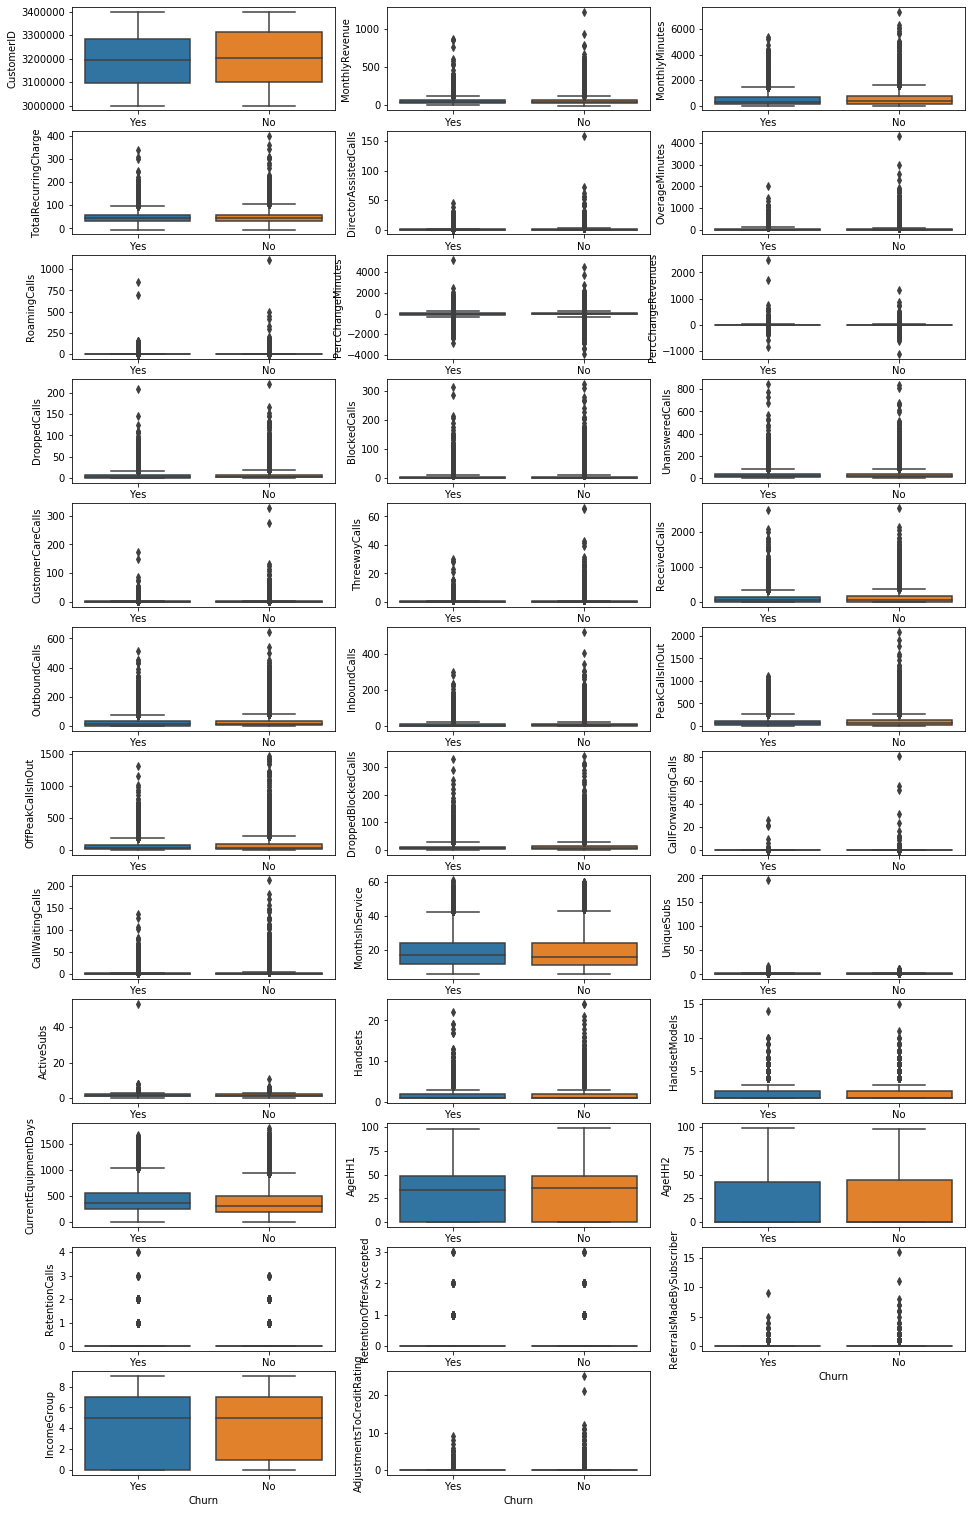

In [66]:
plt.figure(figsize=(16,27))
for index in range(1, 36):
    plt.subplot(35//3+1, 3, index)
    col = df.select_dtypes(exclude='object').columns[index - 1]
    sns.boxplot( y = col, orient='vertical', x= 'Churn', data=df)
#     sns.boxplot( y = col, orient='vertical', data=df)

###
- many columns exist outliers
- we can use windorization to handel outliers
- as mentioned before, some int variables have categorical-variable-like features, i.e. "RetentionOffersAccepted", "RetentionCalls", which have less than 10 unique values, and might need special attention, i.e. when performing outlier reduction.

In [67]:
# univariant analysis - distributions

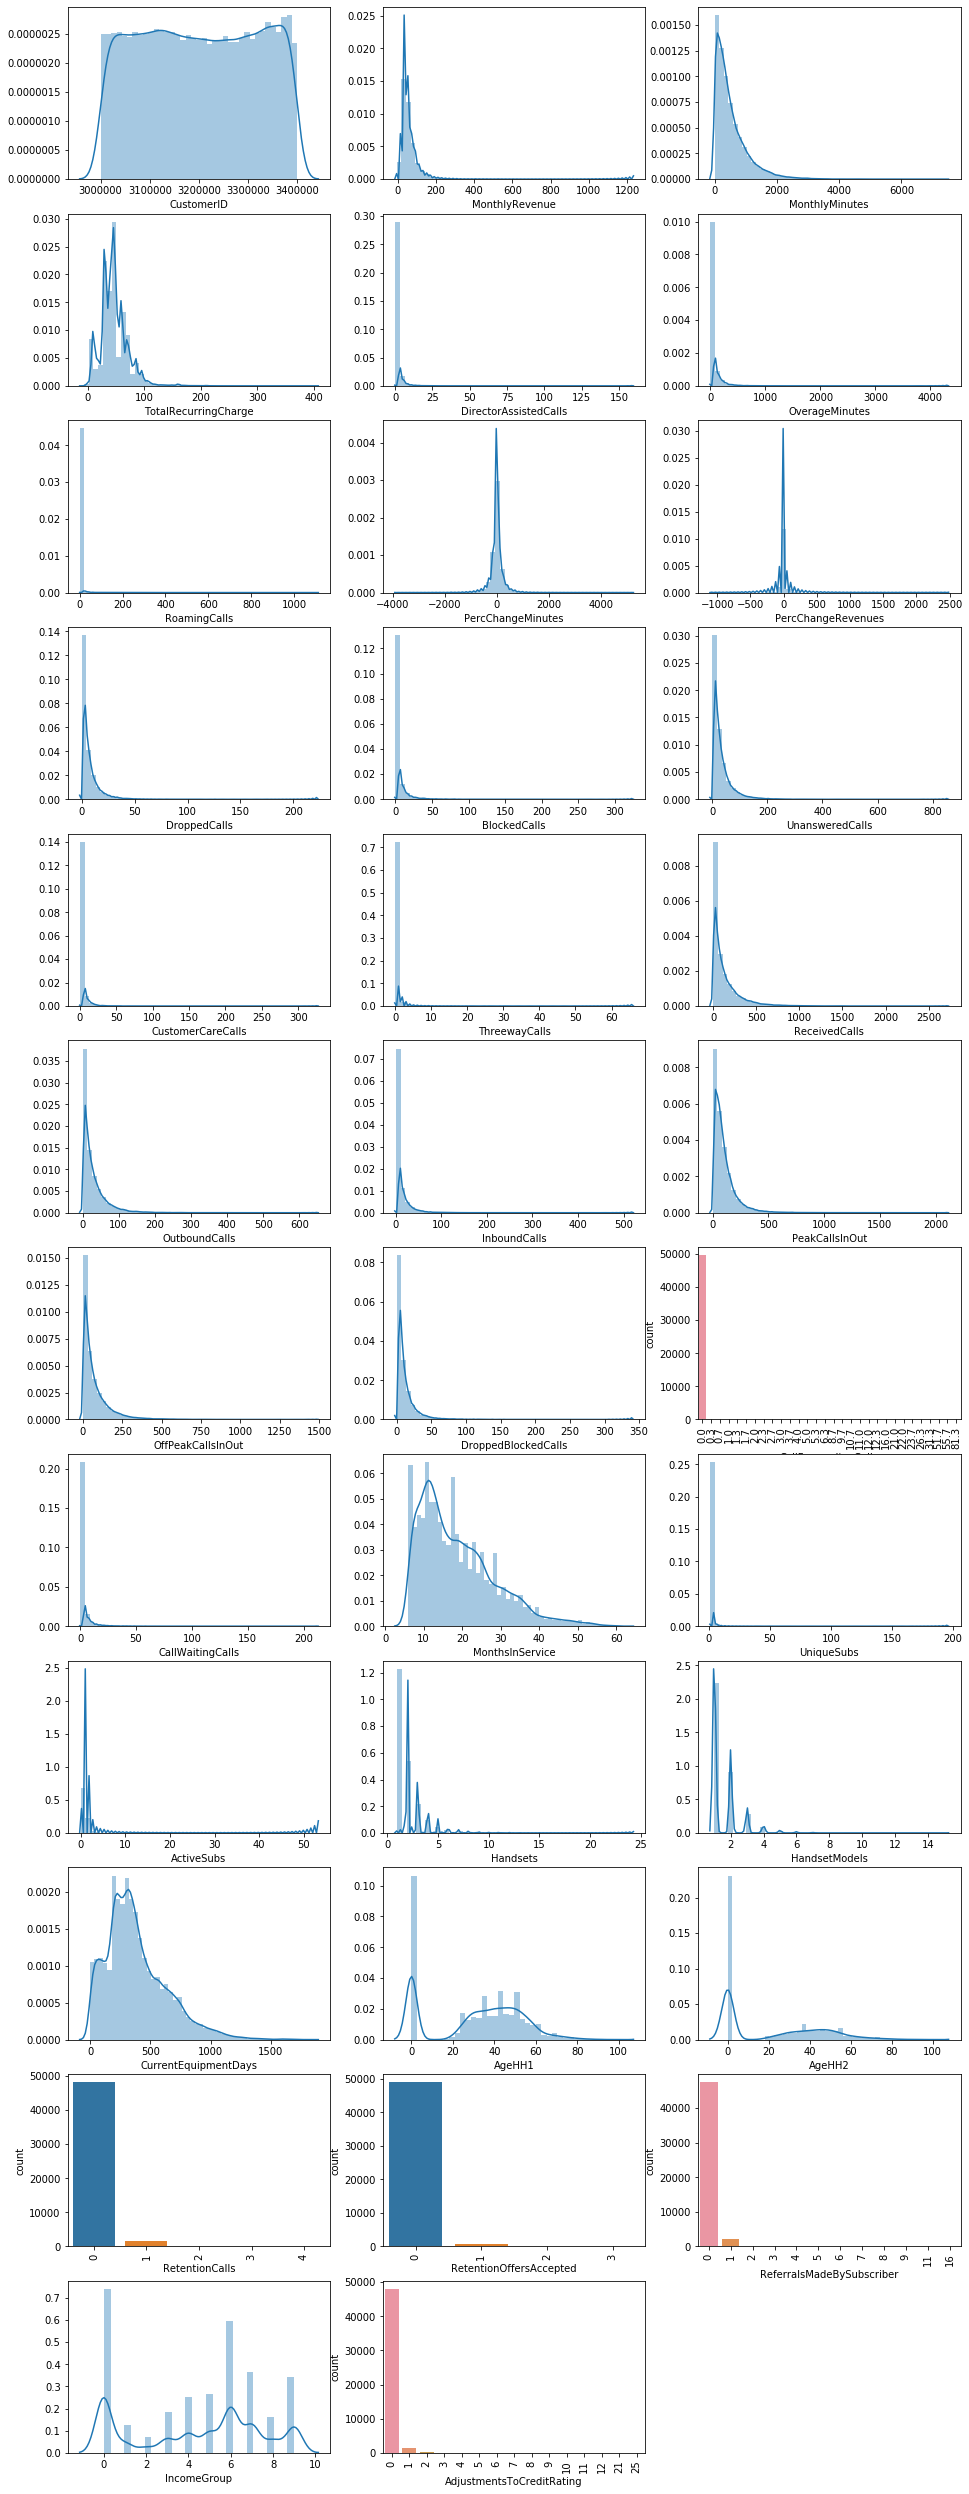

In [68]:
# for continous variables, histogram (or countplot for extreme cases)
plt.figure(figsize=(16,45))
for index in range(1, 36):
    plt.subplot(35//3+1, 3, index)
    col = df.select_dtypes(exclude='object').columns[index - 1]
    try:
        sns.distplot(a = df[col])
    except:
#         sns.distplot(a = df[col], kde=False)
        sns.countplot(df[col])
        plt.xticks(rotation=90)
    


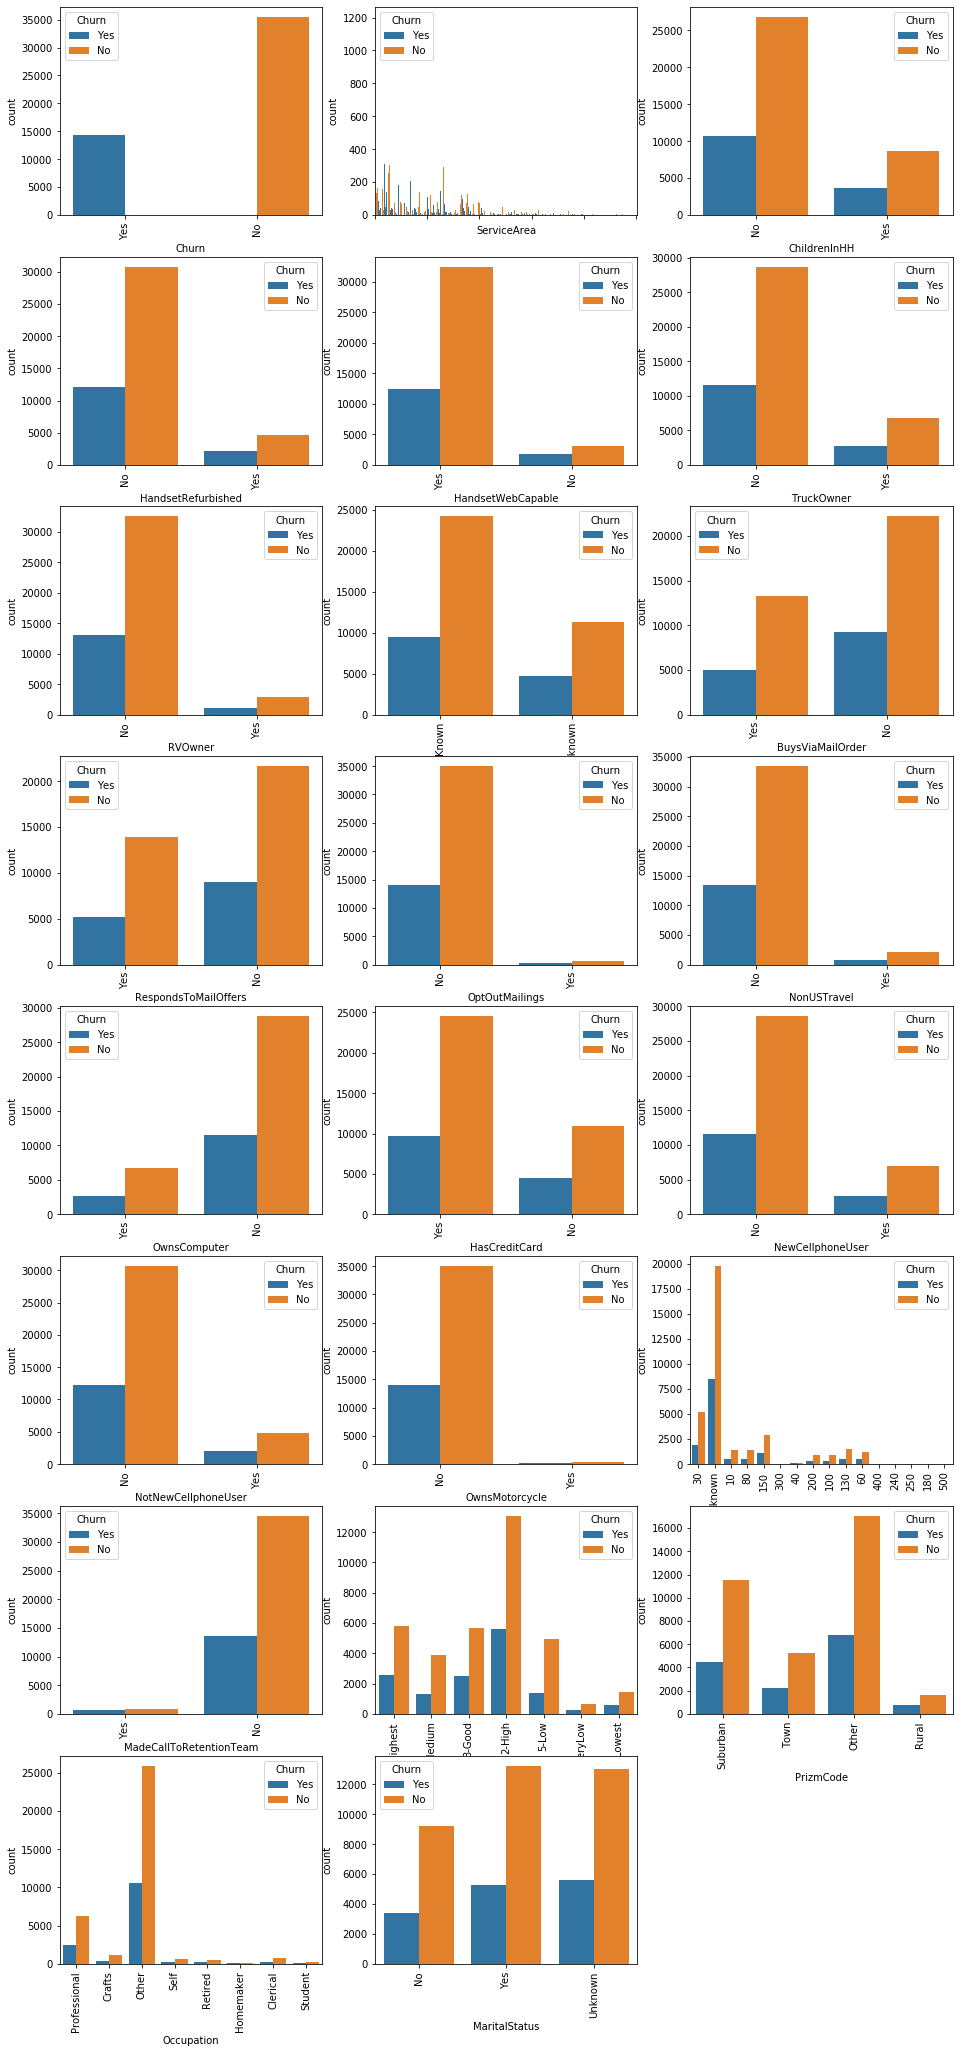

In [69]:
# distribution for object variables
plt.figure(figsize=(16,36))
for index in range(1, 24):
    plt.subplot(23//3+1, 3, index)
    col = df.select_dtypes(include='object').columns[index - 1]
    
    ax = sns.countplot(data = df, x=col, hue="Churn")
    plt.xticks(rotation=90)
    if col == 'ServiceArea':
        ax.set_xticklabels(labels=[])
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, (end-start)//5))

In [70]:
print("the ratio of churn/not churn is: {}".format(df.Churn[df.Churn=='Yes'].count()/df.Churn[df.Churn!='Yes'].count()))

the ratio of churn/not churn is: 0.40139080492130974


In [71]:
# our target variable is somewhat balanced, the ratio of churn/not churn is: 0.40 in the training set
# some continous variables are very skewed, which is consistent with our observation that many outliers on one side.
# we might want to trasnform the data to make it more normal, based on the model to use, i.e. linear regression

In [72]:
# collinearity
# last but not last, let's check coolinearity between continous variables

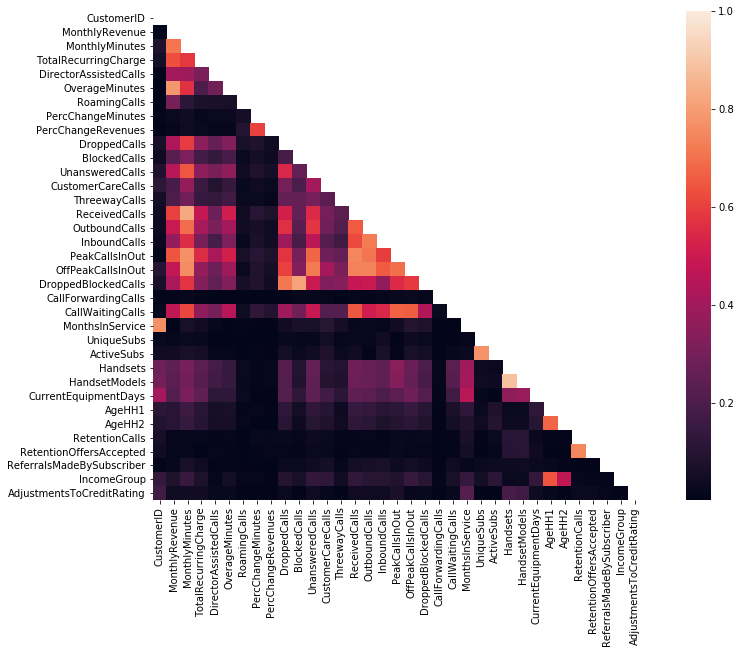

In [74]:
# visualize the correlationship using heatmap
# note: we only care about the absolute value,
# note: either lower triangle or upper triangle would gives the info
corr_matrix = df.select_dtypes(exclude='object').corr()
corr_matrix = np.abs(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, square=True, mask=mask)

In [75]:
colli_threshold = 0.7
high_colli_list = []
for row in np.arange(len(corr_matrix)):
    for col in np.arange(row):
        if corr_matrix.iloc[row, col] >= colli_threshold:
            high_colli_list.append([corr_matrix.index[row], corr_matrix.columns[col]])
#             print("{} - {}".format(corr_matrix.index[row], corr_matrix.columns[col]))
print("when threshold is: {}, there are {} high collinearity-pairs.".format(colli_threshold, len(high_colli_list)))
print(" ")
print("high collinearity pairs:")
for item in high_colli_list:
    print("{} - {}".format(item[0], item[1]))

when threshold is: 0.7, there are 17 high collinearity-pairs.
 
high collinearity pairs:
MonthlyMinutes - MonthlyRevenue
OverageMinutes - MonthlyRevenue
ReceivedCalls - MonthlyMinutes
InboundCalls - OutboundCalls
PeakCallsInOut - MonthlyMinutes
PeakCallsInOut - ReceivedCalls
PeakCallsInOut - OutboundCalls
OffPeakCallsInOut - MonthlyMinutes
OffPeakCallsInOut - UnansweredCalls
OffPeakCallsInOut - ReceivedCalls
OffPeakCallsInOut - OutboundCalls
DroppedBlockedCalls - DroppedCalls
DroppedBlockedCalls - BlockedCalls
MonthsInService - CustomerID
ActiveSubs - UniqueSubs
HandsetModels - Handsets
RetentionOffersAccepted - RetentionCalls


###
- collinear features can cause some problems, i.e. it might cause instablity for many parameter-based estimators
- we might want to get rid of one of the features in the aforementioned feature pairs.

# Data Cleaning and Feature Engineering in pipelines
- The data preprocessing might include missing data handeling, outlier reduction, categorical data encoding, data transformation (i.e. Logarithmic transform, standardization, normalization, PCA).
- As mentioned before, each model might have its specific requirement for data quality and/or features, i.e. KNN require data standardization to achieve better performance, while might not be mandatory for other estimators. logistic regression model is sensitive to outliers, but certain ensemble model like random forest is insensitive to outliers. Even for different Python packages, the requirement for data can be different, i.e. Sklearn package ask for one-hot-encoding data to handle categorical features, while package like h2o can deal with categorical data directly.
- The idea here is try to perform minimium data preprocessing to achieve best model performance, without compromising interpretability, i.e. we might lose intereability of original features after PCA. 
- Accordingly, we will perform specific data cleaning and feature engineering techniques for the particular machine learning models for classification, i.e logistic regression, KNN, decision tree, random forest, naive bayes, SVM, gradient boosting, XGBoost. 
- In addition, we will utilize Sklearn pipeline module to make the preproceesing more managable and neat.

## Data split before feature engineering
- In a real-world situation the data used for evaluation is unseen during training, which means such data is unseen for feature engineering process. So it is only fair to split the data into training set and test set before data cleaning and feature engineering. (Though we did fix the missing data problem)
- This is the reason we choose Sklearn pipeline module. Since we can easily perform the same preprocessing on both training set and test set.

In [76]:
from sklearn.model_selection import train_test_split

X = df.copy()
X = X.drop('Churn', axis=1)
y = df.Churn
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.33, random_state=42 )


### outliers handeling

In [77]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range = (0.1,0.9))
df_robost_test = pd.DataFrame(robust.fit_transform(np.array(df[df.select_dtypes(exclude='object').columns].values)))

df_robost_test.columns = df.select_dtypes(exclude='object').columns
df_robost_test

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,-61.876546,-4.498985,-147.0,-2.555556,0.00,-3.0,0.0,-0.176457,-0.170979,-2.3,...,1.0,1.0,3.875,26.0,0.0,1.0,0.0,0.0,-1.0,0.0
1,-61.874072,-5.792582,-356.0,-3.111111,-0.25,-3.0,0.0,0.001161,0.002743,-2.7,...,1.0,0.0,146.750,4.0,42.0,0.0,0.0,0.0,0.0,0.0
2,-61.872835,-1.915483,-358.0,-0.777778,-0.25,-3.0,0.0,0.003483,0.002743,-3.0,...,0.0,0.0,185.250,-10.0,26.0,0.0,0.0,0.0,1.0,0.0
3,-61.870361,6.255767,946.0,3.333333,0.99,-3.0,0.0,0.188066,0.076804,49.0,...,8.0,3.0,16.000,-6.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-61.869124,-5.764901,-366.0,-3.111111,-0.25,-3.0,0.0,0.005805,0.000914,-3.0,...,3.0,2.0,65.250,10.0,54.0,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49771,61.791192,-8.927846,-290.0,-1.666667,-0.25,-3.0,0.0,0.005805,0.002743,2.7,...,0.0,0.0,69.125,12.0,48.0,0.0,0.0,0.0,-1.0,0.0
49772,61.794904,-3.037461,-303.0,-3.111111,-0.25,40.0,0.0,-0.038310,-0.117948,-2.3,...,0.0,0.0,69.125,22.0,0.0,0.0,0.0,0.0,-2.0,0.0
49773,61.806037,4.356892,358.0,2.777778,-0.25,1.0,0.9,-0.040632,-0.015544,11.3,...,0.0,0.0,69.000,14.0,60.0,0.0,0.0,0.0,2.0,0.0
49774,61.807274,12.753276,18.0,-1.666667,-0.25,247.0,0.0,0.005805,0.002743,1.0,...,1.0,1.0,19.875,-14.0,0.0,0.0,0.0,0.0,-3.0,0.0


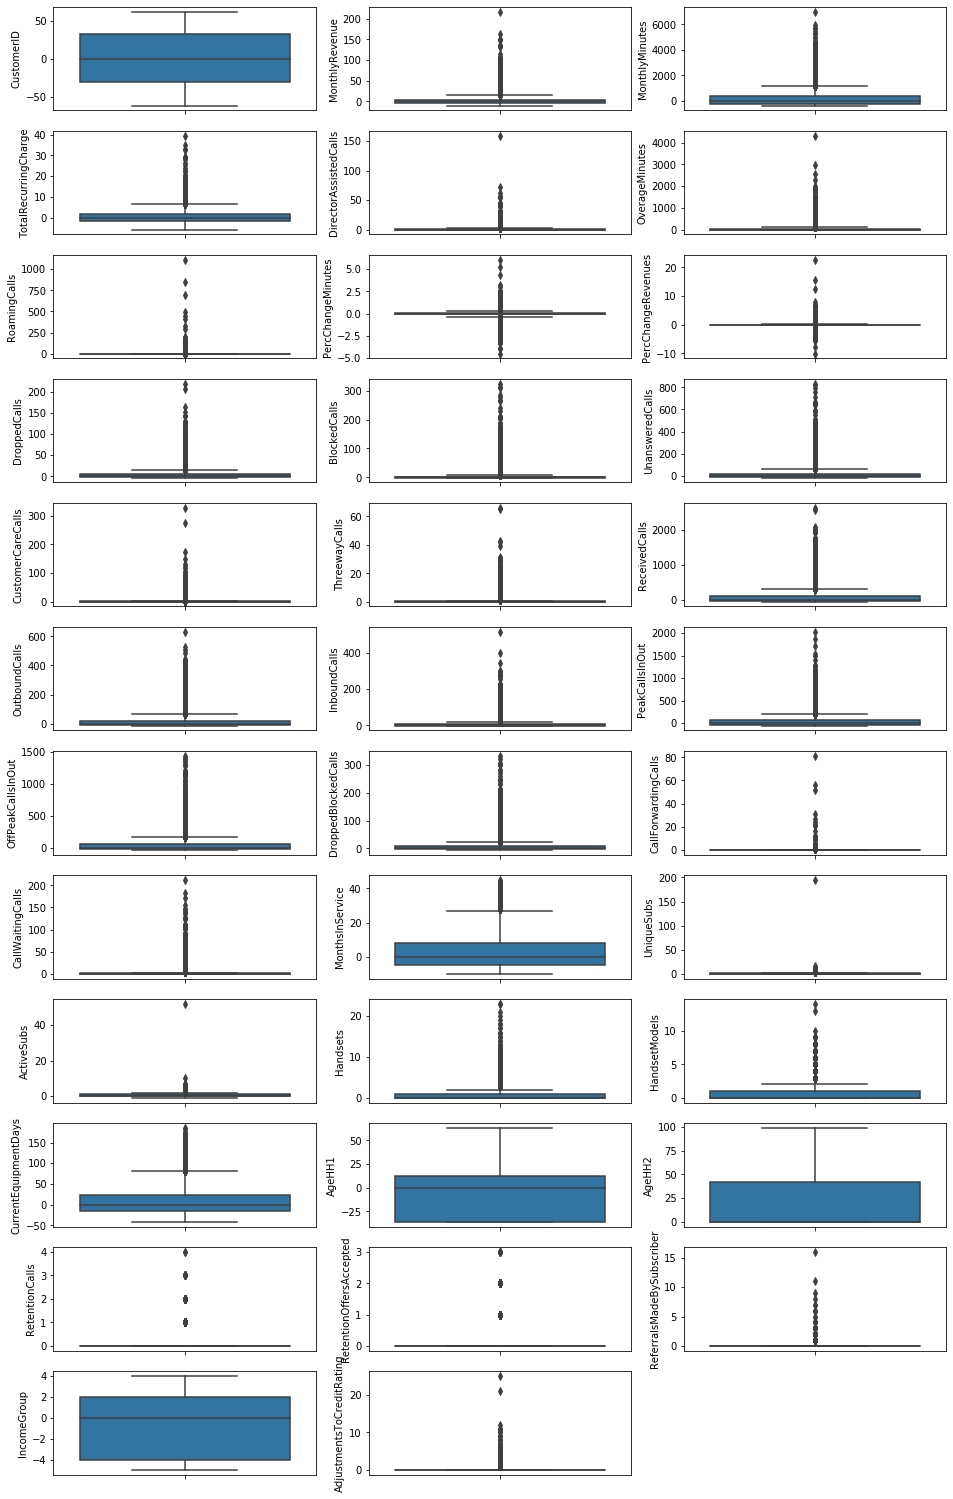

In [78]:
plt.figure(figsize=(16,27))
for index in range(1, 36):
    plt.subplot(35//3+1, 3, index)
    col = df_robost_test.columns[index - 1]
    sns.boxplot( y = col, orient='vertical', data=df_robost_test)
#     sns.boxplot( y = col, orient='vertical', data=df)

In [79]:
df.values

array([[3000002, 'Yes', 24.0, ..., 'Suburban', 'Professional', 'No'],
       [3000010, 'Yes', 16.99, ..., 'Suburban', 'Professional', 'Yes'],
       [3000014, 'No', 38.0, ..., 'Town', 'Crafts', 'Yes'],
       ...,
       [3399942, 'No', 71.99, ..., 'Other', 'Professional', 'Unknown'],
       [3399946, 'Yes', 117.49, ..., 'Other', 'Professional', 'Yes'],
       [3399974, 'No', 95.17, ..., 'Other', 'Other', 'No']], dtype=object)

In [80]:
robust.get_params()

{'copy': True,
 'quantile_range': (0.1, 0.9),
 'with_centering': True,
 'with_scaling': True}

NameError: name 'df_robost_test2' is not defined

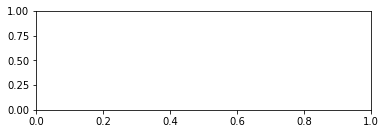

In [81]:
plt.subplot(2,1,1)
sns.distplot(df_robost_test2.values)
plt.subplot(2,1,2)
sns.distplot(df.DirectorAssistedCalls)


In [ ]:
plt.subplot(2,1,1)
sns.boxplot(df_robost_test2.values)
plt.subplot(2,1,2)
sns.boxenplot(df.DirectorAssistedCalls)


In [ ]:
df_robost_test.describe()

In [ ]:
df[['DirectorAssistedCalls']]

In [ ]:
df.info()

### get dummies
- Some models require to use dummy variables, and we can use one-hot-encoding to do that
- Note that for "ServiceArea" variables, there are 743 unique values. It might be painful to handle it using one-hot-encoding. Potential solutions are 
    - using models that can handel categorical data directly, 
    - or transfer the feature into one with less categories (i.e. transform to the associated states), 
    - or drop it.
- We will decide to use which method after choosing a specific model.

In [ ]:
df_dummy = df.select_dtypes(include='object').copy()
df_dummy.drop('ServiceArea', axis = 1, inplace=True)
df_dummy = pd.get_dummies(df_dummy)
df_dummy = pd.concat([df_dummy, df.select_dtypes(exclude='object')], axis=1)
df_dummy

In [ ]:
df_dummy = df.select_dtypes(include='object').copy()
# df_dummy.drop('ServiceArea', axis = 1, inplace=True)
df_dummy = pd.get_dummies(df_dummy)
df_dummy = pd.concat([df_dummy, df.select_dtypes(exclude='object')], axis=1)
df_dummy